# Data Collection

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dental_Xray3.tfrec to Dental_Xray3.tfrec


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
tfrecord_file_path = 'Dental_Xray3.tfrec'

# Data Preprocessing

In [ ]:
raw_dataset = tf.data.TFRecordDataset([tfrecord_file_path])

In [ ]:
def parse_tfrecord_fn(example):
    feature_description = {
        'width': tf.io.FixedLenFeature([], tf.int64),
        'height': tf.io.FixedLenFeature([], tf.int64),
        'image_raw': tf.io.FixedLenFeature([], tf.string),
    }
    example = tf.io.parse_single_example(example, feature_description)

    image = tf.io.decode_jpeg(example['image_raw'], channels=3)

    image = tf.image.resize(image, [100, 100])
    image = tf.image.rgb_to_grayscale(image)

    image = tf.reshape(image, (100 * 100,))

    return image


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


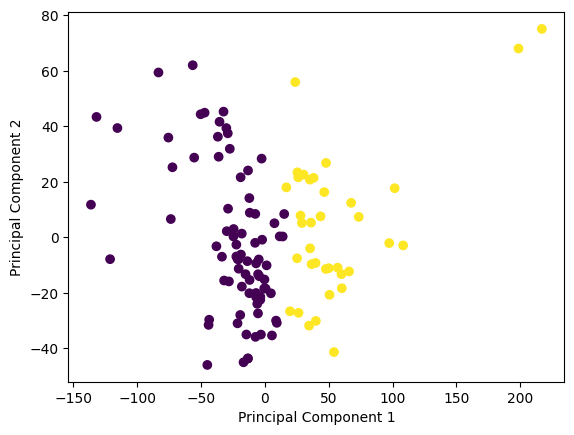

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dataset = raw_dataset.map(parse_tfrecord_fn)

image_data = np.array(list(dataset.as_numpy_iterator()))

scaler = StandardScaler()
image_data_std = scaler.fit_transform(image_data)

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(image_data_std)

pca = PCA(n_components=2)
image_data_pca = pca.fit_transform(image_data_std)

plt.scatter(image_data_pca[:, 0], image_data_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



Visualising the Dataset

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


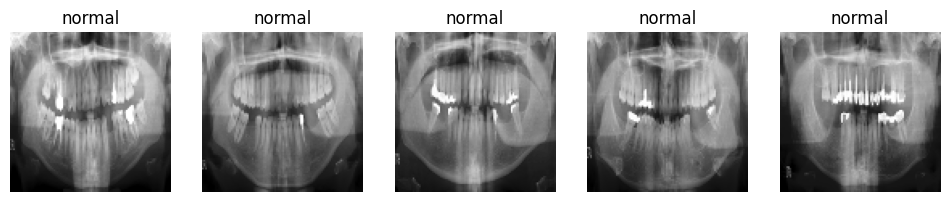

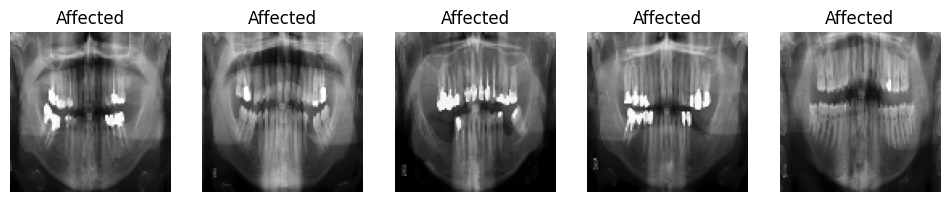

In [ ]:

dataset = raw_dataset.map(parse_tfrecord_fn)
image_data = np.array(list(dataset.as_numpy_iterator()))
scaler = StandardScaler()
image_data_std = scaler.fit_transform(image_data)


kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(image_data_std)

pca = PCA(n_components=2)
image_data_pca = pca.fit_transform(image_data_std)
cluster_0_indices = np.where(labels == 0)[0]
plt.figure(figsize=(12, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(np.reshape(image_data[cluster_0_indices[i]], (100, 100)), cmap='gray')
    plt.title('normal')
    plt.axis('off')
plt.show()

cluster_1_indices = np.where(labels == 1)[0]
plt.figure(figsize=(12, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(np.reshape(image_data[cluster_1_indices[i]], (100, 100)), cmap='gray')
    plt.title('Affected')
    plt.axis('off')
plt.show()


In [ ]:
num_images = sum(1 for _ in raw_dataset)
print("Number of images:", num_images)

Number of images: 116


# CONVOLUTION NEURAL NETWORKS

In [ ]:
image_shape = (100, 100, 1)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=image_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 128)       0

Epoch 1/10
3/3 [==============================] - 2s 611ms/step - loss: 0.6852 - accuracy: 0.6304 - val_loss: 0.3630 - val_accuracy: 0.9583
Epoch 2/10
3/3 [==============================] - 1s 311ms/step - loss: 0.2612 - accuracy: 0.9022 - val_loss: 0.1131 - val_accuracy: 0.9583
Epoch 3/10
3/3 [==============================] - 1s 309ms/step - loss: 0.0804 - accuracy: 0.9891 - val_loss: 0.0793 - val_accuracy: 0.9583
Epoch 4/10
3/3 [==============================] - 1s 311ms/step - loss: 0.0330 - accuracy: 0.9783 - val_loss: 0.0493 - val_accuracy: 0.9583
Epoch 5/10
3/3 [==============================] - 1s 310ms/step - loss: 0.0600 - accuracy: 0.9891 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 1s 303ms/step - loss: 0.0308 - accuracy: 0.9783 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 1s 305ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.2744 - val_accuracy: 0.9583
Epoch 8/10
3/3 [====

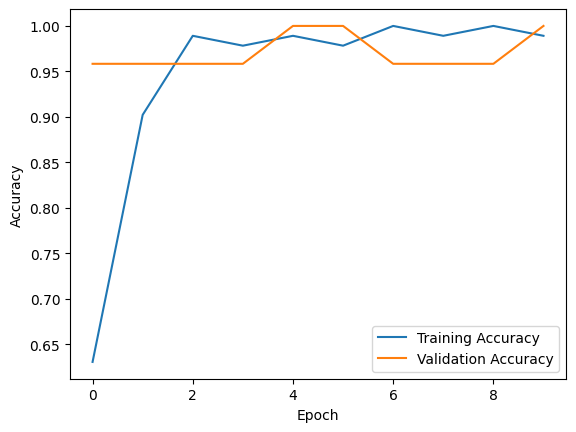

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

X_train_reshaped = X_train_std.reshape((-1, 100, 100, 1))
X_test_reshaped = X_test_std.reshape((-1, 100, 100, 1))

history = model.fit(X_train_reshaped, y_train, epochs=10, validation_data=(X_test_reshaped, y_test))

test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)
print(f'Test Accuracy: {test_accuracy}')

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Predict labels for the test set
predictions = model.predict(X_test_reshaped)
predicted_labels = (predictions > 0.5).astype(int)

# Generate classification report
report = classification_report(y_test, predicted_labels)

print("Classification Report:")
print(report)


1/1 [==============================] - 0s 146ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         8

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



# VGGNet Model

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

image_data_resized_rgb = np.repeat(image_data[..., np.newaxis], 3, -1)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
output_layer = Dense(1, activation='sigmoid')(x)

vgg_model = Model(inputs=base_model.input, outputs=output_layer)

vgg_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

vgg_model.summary()


Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0   

In [ ]:
image_data_rgb = np.repeat(image_data[..., np.newaxis], 3, -1)

image_data_resized = tf.image.resize(image_data_rgb, (100, 100))

predictions_vgg = vgg_model.predict(image_data_resized)

predicted_labels_vgg = (predictions_vgg > 0.5).astype(int)


accuracy_vgg = np.mean(predicted_labels_vgg == labels)
print("Accuracy:", accuracy_vgg)


epoch 1/10
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
3/3 [==============================] - 43s 13s/step - loss: 121.7036 - accuracy: 0.4457 - val_loss: 9.3545 - val_accuracy: 0.5417
Epoch 2/10
3/3 [==============================] - 42s 14s/step - loss: 7.5648 - accuracy: 0.6413 - val_loss: 3.0072 - val_accuracy: 0.5417
Epoch 3/10
3/3 [==============================] - 42s 14s/step - loss: 7.5648 - accuracy: 0.6413 - val_loss: 3.0072 - val_accuracy: 0.5417
Epoch 4/10
3/3 [==============================] - 42s 14s/step - loss: 7.5648 - accuracy: 0.6413 - val_loss: 3.0072 - val_accuracy: 0.5417
Epoch 5/10
3/3 [==============================] - 42s 14s/step - loss: 7.5648 - accuracy

In [ ]:
from sklearn.metrics import classification_report

predictions = vgg_model.predict(image_data_rgb)
predicted_labels = np.argmax(predictions, axis=1)

report = classification_report(labels, predicted_labels)

print("Classification Report:")
print(report)


4/4 [==============================] - 14s 3s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.69      1.00      0.82        80
           1       0.00      0.00      0.00        36

    accuracy                           0.69       116
   macro avg       0.34      0.50      0.41       116
weighted avg       0.48      0.69      0.56       116



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# NASNET MODEL

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report

num_classes = 2

base_model = NASNetLarge(weights='imagenet', include_top=False, input_shape=(331, 331, 3))

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
output_layer = Dense(num_classes, activation='softmax')(x)  # Adjust num_classes according to your dataset

nasnet_model = Model(inputs=base_model.input, outputs=output_layer)

nasnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

nasnet_model.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 331, 331, 3)]        0         []                            
                                                                                                  
 stem_conv1 (Conv2D)         (None, 165, 165, 96)         2592      ['input_5[0][0]']             
                                                                                                  
 stem_bn1 (BatchNormalizati  (None, 165, 165, 96)         384       ['stem_conv1[0][0]']          
 on)                                                                                              
                                                                                                  
 activation_1040 (Activatio  (None, 165, 165, 96)         0         ['stem_bn1[0][0]']      

In [ ]:
# Train the model
history = nasnet_model.fit(image_data,labels, epochs=10, validation_split=0.2)

test_loss, accuracy_nasnet = nasnet_model.evaluate(image_data, labels)
print("Accuracy:", test_accuracy)

predictions = nasnet_model.predict(image_data)

predicted_classes = np.argmax(predictions, axis=1)

report = classification_report(labels, predicted_classes)
print("Classification Report:\n", report)


epoch 1/10
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
3/3 [==============================] - 43s 13s/step - loss: 121.7036 - accuracy: 0.4457 - val_loss: 9.3545 - val_accuracy: 0.5417
Epoch 2/10
3/3 [==============================] - 42s 14s/step - loss: 7.5648 - accuracy: 0.6413 - val_loss: 3.0072 - val_accuracy: 0.5417
Epoch 3/10
3/3 [==============================] - 42s 14s/step - loss: 7.5648 - accuracy: 0.6413 - val_loss: 3.0072 - val_accuracy: 0.5417
Epoch 4/10
3/3 [==============================] - 42s 14s/step - loss: 7.5648 - accuracy: 0.6413 - val_loss: 3.0072 - val_accuracy: 0.5417
Epoch 5/10
3/3 [==============================] - 42s 14s/step - loss: 7.5648 - accuracy

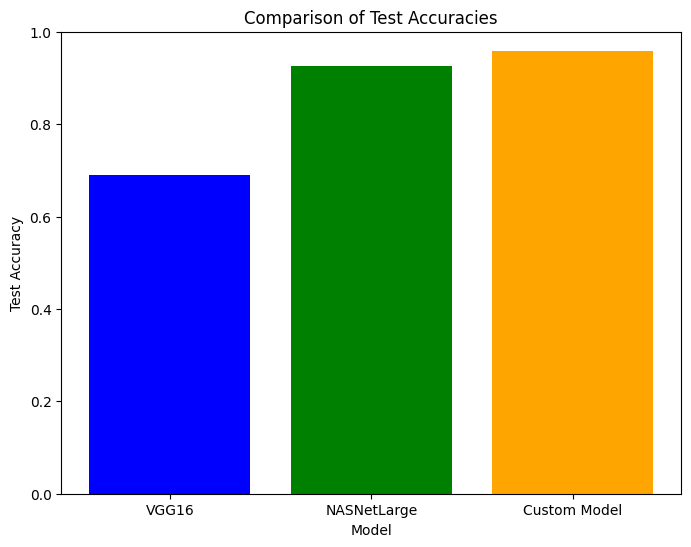

In [ ]:
import matplotlib.pyplot as plt

# Define the test accuracies for each model
test_accuracies = [accuracy_vgg, accuracy_nasnet, test_accuracy]

# Define the model names
model_names = ['VGG16', 'NASNetLarge', 'Custom Model']

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(model_names, test_accuracies, color=['blue', 'green', 'orange'])
plt.title('Comparison of Test Accuracies')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)
plt.show()


Saving Ellipse 362.png to Ellipse 362 (1).png


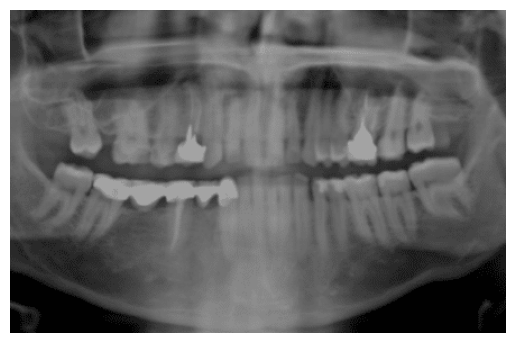

1/1 [==============================] - 0s 111ms/step
Normal


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import numpy as np
import io
from PIL import Image
from google.colab import files

def preprocess_image(img):
    img = img.resize((100, 100))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=-1)
    img_array = img_array.astype(np.float32) / 255.0
    return img_array

def predict(image):
    img_array = preprocess_image(image)
    prediction = model.predict(np.expand_dims(img_array, axis=0))
    return prediction

uploaded = files.upload()

for filename in uploaded.keys():
    img = Image.open(io.BytesIO(uploaded[filename]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()
    prediction = predict(img)
    if prediction[0][0] > 0.5:
        print("Affected")
    else:
        print("Normal")


Saving download (3).jpg to download (3) (1).jpg


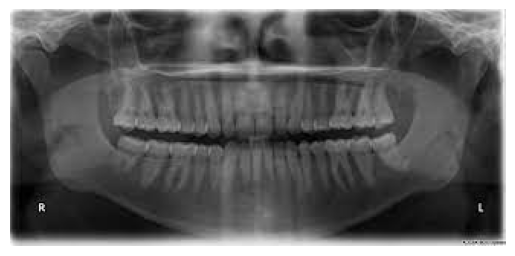

1/1 [==============================] - 1s 131ms/step
Affected


In [ ]:

def preprocess_image(img):
    img = img.resize((100, 100))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=-1)
    img_array = img_array.astype(np.float32) / 255.0
    return img_array

def predict(image):
    img_array = preprocess_image(image)
    prediction = model.predict(np.expand_dims(img_array, axis=0))
    return prediction

uploaded = files.upload()

for filename in uploaded.keys():
    img = Image.open(io.BytesIO(uploaded[filename]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()
    prediction = predict(img)
    if prediction[0][0] > 0.5:
        print("Affected")
    else:
        print("Normal")